## Proyecto Redes Neuronales. Compración Perceptrón simple vs Perceptrón multicapa en  clasificación

Según los CDC, las enfermedades del corazón son una de las principales causas de muerte. Aproximadamente la mitad de los estadounidenses (47%) presentan al menos uno de los tres factores de riesgo clave de las enfermedades cardíacas: presión arterial alta, colesterol alto y tabaquismo. Otros indicadores clave son la condición de diabético, la obesidad (IMC elevado), la falta de actividad física o el consumo excesivo de alcohol. Detectar y prevenir los factores que más influyen en las enfermedades del corazón es muy importante en la asistencia sanitaria. Los avances informáticos, por su parte, permiten aplicar métodos de aprendizaje automático para detectar "patrones" a partir de los datos que puedan predecir el estado de un paciente.

En este proyecto vas a **comparar la eficacia de dos métodos diferentes en la predicción del riesgo de padecer una enfermedad cardiaca**. 

El conjunto de datos procede de los CDC y es una parte importante del Sistema de Vigilancia de los Factores de Riesgo en el Comportamiento, que realiza encuestas telefónicas anuales para recopilar datos sobre el estado de salud de los residentes en EE.UU. El dataset original tiene casi 300 variables, pero se ha reducido a sólo unas 20 variables. 

Tienes que realizar las siguientes tareas:
    - Crear una función perceptron simple que dado un ejemplo o conjunto de ejemplos devuelva la clase predicha (-1, 1).
    - Crear una función para calcular el coste 'bisagra' para medir el error en clasificación.
    - Crear una función que calcule el gradiente de la función de coste por cada variable del perceptrón.
    - Programar el algortimo del descenso con gradiente y obtener los parámetros del perceptrón que mejor se ajusten a los datos de entrenamiento.
    - Calcular la matriz de confusión en los ejemplos de test.
    - Utilizando la librería sklearn entrenar 2 arquitecturas diferentes de redes neuronales.
    - Comparar las matrices de confusión de las Redes Neuronales con al obtenida por el perceptrón.

En la siguiente celda se leen los datos y se generan los conjuntos de entrenamiento y de test.

In [1]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np

datos = pd.read_csv("heart_2020.csv")
datos = datos.drop(['Unnamed: 0'], axis=1)
datos = shuffle(datos)
datos.head()



,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
8739,0,1,0,0,0,0,4,2,0,1,1,1,0,0,39.06,30.0,15.0,5.0
12022,0,1,0,0,0,1,9,5,0,1,4,0,0,0,26.69,0.0,0.0,8.0
5817,0,0,0,0,0,1,2,5,0,1,0,0,0,0,21.52,0.0,0.0,5.0
13835,0,0,0,0,0,1,10,4,1,1,2,0,0,0,28.13,0.0,0.0,6.0
2949,0,1,0,0,1,0,10,5,0,1,4,0,0,1,42.27,0.0,1.0,7.0


In [2]:
datos.describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
count,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.456217,0.49335,0.060150,0.087117,0.229700,0.523233,7.620233,4.611650,0.458683,0.719467,2.231617,0.149533,0.073217,0.127967,28.971355,5.141217,4.201083,7.118750
std,0.498083,0.49996,0.237767,0.282008,0.420643,0.499464,3.413152,1.024753,0.838951,0.449264,1.396139,0.356616,0.260494,0.334055,6.541266,9.761226,8.466793,1.571938
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.210000,0.000000,0.000000,1.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.410000,0.000000,0.000000,6.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,8.000000,5.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,27.920000,0.000000,0.000000,7.000000
75%,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,10.000000,5.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,32.280000,4.000000,3.000000,8.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,93.970000,30.000000,30.000000,24.000000


In [3]:
from sklearn.model_selection import train_test_split
# Ten en cuenta que la variable y tiene valores (0 y 1)

y = np.array(datos['HeartDisease'])
y[y==0] = -1
datos = datos.drop(['HeartDisease'], axis=1)
X = np.array(datos)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 2)


La librería sklearn tiene implementada una clase MLPClassifier que es un perceptrón multicapa con el algoritmo de backpropagation que podemos utilizar en la siguiente celda se crea un preceptrón con una capa oculta y dos neuronas para que se ajuste a la función XOR.
Para ayuda sobre la clase y sus parámetros visitar: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [4]:
# X = np.array([[2,2], [0,0], [2,0], [0,2]])
# y = np.array([1, 1, 0, 0])

In [5]:
from sklearn.neural_network import MLPClassifier
# Función para crear el perceptrón multicapa
pmc = MLPClassifier(solver='lbfgs', alpha=1e-2, hidden_layer_sizes=(2,), activation='logistic', random_state=1)
# Al llamar a fit se realiza el entrenamiento
pmc.fit(X, y)

y_p = pmc.predict(X)


C:\Brother\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y, y_p)
print(cm)

[[24592  8035]
 [ 6646 20727]]


In [7]:
# - Crear una función perceptron simple que dado un ejemplo o conjunto de ejemplos devuelva la clase predicha (-1, 1).
def perceptron(x,w):
    return np.sign(np.dot(x,w))
# - Crear una función para calcular el coste 'bisagra' para medir el error en clasificación.
def coste(X, y, w):
    loss = 0
    m = len(X)
    for i in range(len(X)):
        loss += max(1-(np.dot(w,X[i])*y[i]),0)        
    return loss/m
# - Crear una función que calcule el gradiente de la función de coste por cada variable del perceptrón.
def gradientes(X,y,w):
    m = len(X)
    ws = []
    dot = np.dot(X,w)*y <1
    for i in range(len(w)):
        nw = 0
        nw = np.dot(-X[:,i]*dot,y)
        ws.append(nw/m)        
    return np.array(ws)
# - Programar el algortimo del descenso con gradiente y obtener los parámetros del perceptrón que mejor se ajusten a los datos de entrenamiento.
import matplotlib.pyplot as plt 
def DescensoGradiente(X, y, w_ini, alpha = 0.1, iters = 100):
    w = w_ini
    Loss = []
    for i in range(iters):
        grad = gradientes(X,y,w)
        for j in range(len(w)):
            w[j] = w[j] - (alpha*grad[j]) 
        Loss.append(coste(X,y, w))
    return Loss,w


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


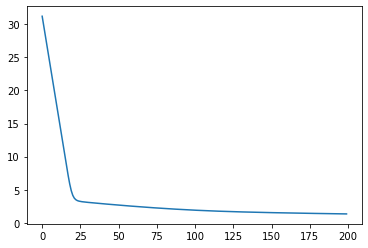

In [8]:
w_ini = [1 for i in range(X_train.shape[1]+1)]
print(w_ini)
X_train_ones = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
L,w = DescensoGradiente(X_train_ones,y_train,w_ini,0.005,200)

plt.plot(L)
plt.show()

In [9]:
ypred= perceptron(X_train_ones,w)
cm = confusion_matrix(y_train, ypred)
print(cm)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred))

[[16669  9437]
 [ 7633 14261]]
0.644375


In [10]:
# - Calcular la matriz de confusión en los ejemplos de test.
X_test_ones = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
ypred2= perceptron(X_test_ones,w)
cm1 = confusion_matrix(y_test, ypred2)
print(cm1)
print(accuracy_score(y_test,ypred2))


[[4150 2371]
 [1852 3627]]
0.6480833333333333


In [11]:
# - Utilizando la librería sklearn entrenar 2 arquitecturas diferentes de redes neuronales.

##RED NEURONAL CON 2 CAPAS
pmc = MLPClassifier(solver='sgd', alpha=.5e-2, hidden_layer_sizes=(2,), activation='logistic', random_state=1,max_iter=400)
pmc.fit(X_train, y_train)
y_p = pmc.predict(X_test)
cm2 = confusion_matrix(y_test, y_p)
print(cm2)

##RED NEURONAL CON 4 CAPAS
pmc = MLPClassifier(solver='sgd', alpha=.5e-2, hidden_layer_sizes=(4,), activation='logistic', random_state=1,max_iter=400)
pmc.fit(X_train, y_train)
y_p = pmc.predict(X_test)
cm3 = confusion_matrix(y_test, y_p)
print(cm3)



[[4689 1832]
 [1089 4390]]
[[4985 1536]
 [1361 4118]]


In [14]:
# - Comparar las matrices de confusión de las Redes Neuronales con la obtenida por el perceptrón.

##Dado que estamos comparando la eficacia para predecir el riesgo de padecer una enfermedad cardiaca, lo que de verdad nos
##importa son los falsos negativos, es decir, la gente que vaya a padecer una enfermedad cardiaca y hayamos predecido que
##no iba a padecerla.Para comparar los falssos negativos utilizaremos una funcion que los  funcion recall
print("El recall del perceptron simple es: ",recall(cm1))
print("El recall de la primera neurona multicapa: ",recall(cm2))
print("El recall de la segunda neurona multicapa: ",recall(cm3))
##Como podemos observar, la primera neurona tiene un valor mas grande por lo que tiene menos falsos negativos y sera 
##mas eficiente en este problema si cambiamos el umbral
print("La accuracy del perceptron simple es: ",accuracy(cm1))
print("La accuracy de la primera neurona multicapa: ",accuracy(cm2))
print("La accuracy de la segunda neurona multicapa: ",accuracy(cm3))
##En este caso las dos neuronas tienen resultados muy parecidos, mayores a los del perceptron simple.q
print("La precision del perceptron simple es: ",precision(cm1))
print("La precision de la primera neurona multicapa: ",precision(cm2))
print("La precision de la segunda neurona multicapa: ",precision(cm3))
##La mayor precision la tiene de nuevo la segunda neurona
print("El TNR del perceptron simple es: ",TNR(cm1))
print("El TNR de la primera neurona multicapa: ",TNR(cm2))
print("El TNR de la segunda neurona multicapa: ",TNR(cm3))
##Observando todos los parametros,podemos concluir que es mas efectivo utilizar una neurona multicapa ya que todos 
##sus parametros son mayores que los del perceptron simple.Esto quiere decir que acertara mas dado que tiene menos falsos
##negativos y menos falsos positivos.Dentro de los dos tipos de neuronas multicapas, la segunda con mas capas acierta aun 
##mas que la primera por lo que seria mas eficiente elegir ese metodo.

##Una posible mejora seria aumentar el umbral que en este caso es 0 para lo que tendriamos que utilizar un predictor de 
##probabilidad para valorar si esta por encima o por debajo del umbral.

#            ¿se podría utilizar esta IA como un robo-doctor? 
#Si porque despues de entrenar a la IA podria llegar un paciente con determinadas caracteristicas y podria predecir si 
#tiene riesgo de padecer una enfermedad cardiaca.De hecho ya se ha visto que hay modelos IA que pueden predecir la 
#probabilidad de tener algun tipo de enfermedad mental solo con la informacion de las redes sociales
#mejor que los propios especialistas en ese area.

El recall del perceptron simple es:  0.6619821135243658
El recall de la primera neurona multicapa:  0.8012411023909473
El recall de la segunda neurona multicapa:  0.7515970067530571
La accuracy del perceptron simple es:  0.6480833333333333
La accuracy de la primera neurona multicapa:  0.7565833333333334
La accuracy de la segunda neurona multicapa:  0.7585833333333334
La precision del perceptron simple es:  0.604701567189063
La precision de la primera neurona multicapa:  0.7055609128897461
La precision de la segunda neurona multicapa:  0.728333922886452
El TNR del perceptron simple es:  0.6364054592853857
El TNR de la primera neurona multicapa:  0.7190614936359454
El TNR de la segunda neurona multicapa:  0.7644533047078669


In [13]:
#los valores de la  matriz estan intercambiados comparando con el metodo que se usa en teoria dado que la libreria de Sklearn
#utiliza la matriz transpuesta
def accuracy(m):
    VP = m[1][1]
    FP = m[0][1]
    FN = m[1][0]
    VN = m[0][0]
    return (VP+VN)/(VP+FP+VN+FN)
def recall(m):
    VP = m[1][1]
    FP = m[0][1]
    FN = m[1][0]
    VN = m[0][0]
    return (VP)/(VP+FN)
def precision(m):
    VP = m[1][1]
    FP = m[0][1]
    FN = m[1][0]
    VN = m[0][0]
    return (VP)/(VP+FP)
def TNR(m):
    VP = m[1][1]
    FP = m[0][1]
    FN = m[1][0]
    VN = m[0][0]
    return VN/(VN+FP)



In [ ]:
# X = [[1,0,2],[1,-2,0],[1,1,-1]]
# y = [1,1,-1]
# w = [0,0.5,1]
# X = np.array(X)
# w = np.array(w)
# y = np.array(y)
# print(coste(X,y,w))
# print(gradientes(X,y,w))
# print(DescensoGradiente(X,y,w,1,1))

#EJEMPLO DE CLASE